In [1]:
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import numpy as np

path_data = '~/git/nessi/data/'

# Arrhenius

$\eta = \eta_0 \cdot e^{\frac{E_a}{RT}}$


# Carraeu

$\eta(\dot{\gamma}) = \eta_\infty + (\eta_0 - \eta_\infty) \left( 1 + (\lambda \dot{\gamma})^n \right)^{\frac{(n-1)}{2}}$


In [ ]:
R = 8.314
def lnVisc(x, m, t):
    return m / R * x + np.log(t)

def Arrhenius(T, EA, Visc0):
    return Visc0 * np.exp(EA / (R * T))

In [12]:
data = pd.read_excel(path_data + 'PLA_Filament_210_FS.xls', sheet_name='Frequenzsweep - 1', header=1)
T_210 = data['Temperatur'][1:]
visc_210 = data['Komplexe Viskosität'][1:]
w_210 = data['Winkelfrequenz'][1:]

data = pd.read_excel(path_data + 'PLA_Filament_195_FS.xls', sheet_name='Frequenzsweep - 1', header=1)
T_195 = data['Temperatur'][1:]
visc_195 = data['Komplexe Viskosität'][1:]

data = pd.read_excel(path_data + 'PLA_Filament_225_FS.xls', sheet_name='Frequenzsweep - 1', header=1)
T_225 = data['Temperatur'][1:]
visc_225 = data['Komplexe Viskosität'][1:]

T = np.array([T_195.iloc[0], T_210.iloc[0], T_225.iloc[0]]) + 273 # Kelvin
visc = np.array([visc_195.iloc[0], visc_210.iloc[0], visc_225.iloc[0]])

E_A:  60591.80255716567 ± 3945.6685516368157 [J/mol]
Visc0:  0.0003387065838060676 ± 0.0003331240286249439 [J/mol]


/var/folders/k5/1djnh_r121358ncslsc8gk500000gn/T/ipykernel_14273/779430531.py:3: RuntimeWarning: invalid value encountered in log
  return m / R * x + np.log(t)


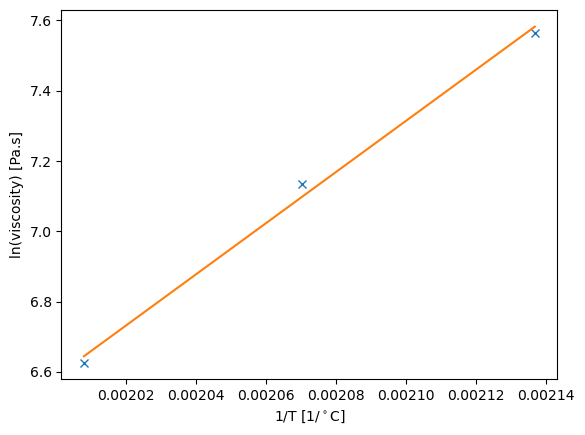

In [8]:
fig, ax = plt.subplots()

ax.set_xlabel(rf'1/T [1/$^\circ$C]')
ax.set_ylabel('ln(viscosity) [Pa.s]')

ax.plot(1/T, np.log(visc), 'x')

popt, pcov = opt.curve_fit(lnVisc, 1/T, np.log(visc))

x = np.linspace(np.min(1/T), np.max(1/T))
ax.plot(x, lnVisc(x, *popt))

R = 8.314
err = np.sqrt(np.diag(pcov))
Visc0, Visc0_err = popt[1], err[1]
EA, EA_err = popt[0], err[0]

print(rf'E_A: ', EA, '±', EA_err, '[J/mol]')
print(rf'Visc0: ', Visc0, '±', Visc0_err, '[J/mol]')

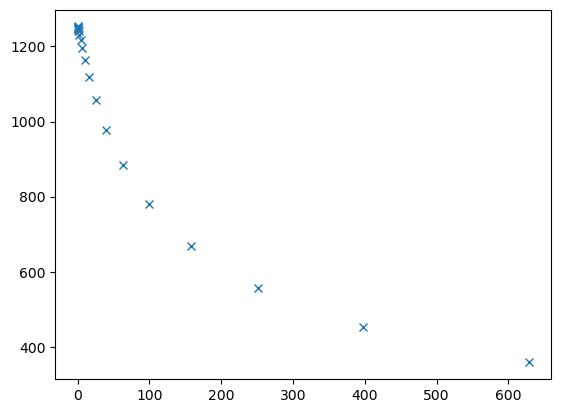

In [14]:
plt.plot(w_210, visc_210, 'x')

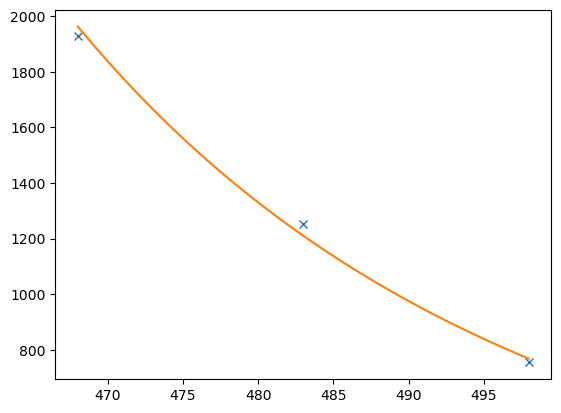

In [ ]:
fig, ax = plt.subplots()

y = np.linspace(np.min(T), np.max(T))
ax.plot(T, visc, 'x')
ax.plot(y, Arrhenius(y, EA, Visc0))
#ax.plot(y, Visc(y, EA + EA_err, Visc0 + Visc0_err))
#ax.plot(y, Visc(y, EA - EA_err, Visc0 - Visc0_err))